In [5]:
from PIL import Image
import requests
import os
import pandas as pd
from transformers import CLIPProcessor, CLIPModel

In [2]:
# Load model directly
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

processor = AutoProcessor.from_pretrained("patrickjohncyh/fashion-clip")
model = AutoModelForZeroShotImageClassification.from_pretrained("patrickjohncyh/fashion-clip")

In [6]:
outfits= pd.read_csv('./datathon/dataset/outfit_data.csv')
product = pd.read_csv('./datathon/dataset/product_data.csv')

In [17]:
#Deleting all the products that are not clothes
product = product[(product.des_product_category!= 'Beauty') & (product.des_product_category!= 'Home')]
# Delete all products for men and kids due to desbalance
product = product[(product.des_line== 'SHE')]
product = product[(product.des_sex== 'Female')]
product = product[(product.des_age== 'Adult')]

product =product.drop(['des_sex','des_line','des_age'], axis = 1)

# Delete the deleted products from outfits
outfits = outfits[outfits.cod_modelo_color.isin(product.cod_modelo_color.unique())]

In [16]:
product.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename,emb
0,41085800-02,02,OFFWHITE,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg,"[[[tensor(1.6968), tensor(1.6968), tensor(1.69..."
1,53000586-TO,TO,TEJANO OSCURO,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg,"[[[tensor(1.6822), tensor(1.6968), tensor(1.69..."
2,53030601-81,81,ROSA PASTEL,PINK,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53030601_81.jpg,"[[[tensor(1.6968), tensor(1.6968), tensor(1.68..."
3,53050730-15,15,MOSTAZA,YELLOW,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53050730_15.jpg,"[[[tensor(1.5946), tensor(1.5800), tensor(1.56..."
4,53070773-70,70,ROJO,RED,Female,Adult,SHE,P-PLANA,Tops,Shirts,Shirt,Shirt,datathon/images/2019_53070773_70.jpg,"[[[tensor(1.6384), tensor(1.6384), tensor(1.63..."


In [24]:
outfits.to_pickle('./datathon/dataset/final_outfits')
product.to_pickle('./datathon/dataset/final_products')

In [22]:
inputs['pixel_values'].view(-1).numpy()

array([1.8427455, 1.8281472, 1.8281472, ..., 1.690855 , 1.690855 ,
       1.705075 ], dtype=float32)

In [23]:
def getEmbeding(x):
    try:
        img = Image.open(x)
        inputs = processor(images=[img], return_tensors="pt", padding=True)
        return inputs['pixel_values'].view(-1).numpy()
    except:
        return None

product['emb'] = product['des_filename'].apply(getEmbeding)

In [9]:
product[product.des_filename=='datathon/images/2023_57074037_98.jpg']

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename
498,57074037-98,98,VISON,GREY,Female,Adult,SHE,C-COMPLEMENTOS,Beauty,Fragance,Fragances,Fragance,datathon/images/2023_57074037_98.jpg


In [29]:
inputs = processor(images=[image_pos,image_neg], return_tensors="pt", padding=True)

In [45]:
inputs2 = processor(images=[image,image1,image2,image3], return_tensors="pt", padding=True)

In [30]:
embpos, emb_neg = inputs['pixel_values']

In [48]:
emb1

tensor([[[1.6968, 1.6968, 1.6822,  ..., 1.8135, 1.8135, 1.8135],
         [1.6822, 1.6968, 1.6968,  ..., 1.8135, 1.8135, 1.8135],
         [1.6822, 1.6968, 1.6968,  ..., 1.8135, 1.8135, 1.8135],
         ...,
         [1.5654, 1.5800, 1.5946,  ..., 1.6968, 1.6968, 1.7114],
         [1.5654, 1.5800, 1.5800,  ..., 1.6822, 1.6968, 1.6968],
         [1.5800, 1.5800, 1.5654,  ..., 1.6968, 1.6968, 1.6968]],

        [[1.7897, 1.7897, 1.7747,  ..., 1.9098, 1.9098, 1.9098],
         [1.7747, 1.7897, 1.7897,  ..., 1.9098, 1.9098, 1.9098],
         [1.7747, 1.7897, 1.7897,  ..., 1.9098, 1.9098, 1.9098],
         ...,
         [1.6397, 1.6547, 1.6697,  ..., 1.7897, 1.7897, 1.8047],
         [1.6397, 1.6547, 1.6547,  ..., 1.7747, 1.7897, 1.7897],
         [1.6547, 1.6547, 1.6397,  ..., 1.7897, 1.7897, 1.7897]],

        [[1.7762, 1.7762, 1.7620,  ..., 1.9184, 1.9184, 1.9184],
         [1.7620, 1.7762, 1.7762,  ..., 1.9184, 1.9184, 1.9184],
         [1.7620, 1.7762, 1.7762,  ..., 1.9184, 1.9184, 1.

In [49]:
emb2

tensor([[[1.5654, 1.5654, 1.5654,  ..., 1.7406, 1.7406, 1.7406],
         [1.5654, 1.5654, 1.5654,  ..., 1.7406, 1.7406, 1.7260],
         [1.5654, 1.5654, 1.5654,  ..., 1.7406, 1.7406, 1.7406],
         ...,
         [1.5070, 1.5070, 1.4924,  ..., 1.6384, 1.6384, 1.6530],
         [1.4924, 1.4924, 1.4924,  ..., 1.6530, 1.6384, 1.6530],
         [1.4924, 1.4924, 1.4924,  ..., 1.6530, 1.6530, 1.6530]],

        [[1.6397, 1.6397, 1.6397,  ..., 1.8348, 1.8348, 1.8348],
         [1.6397, 1.6397, 1.6397,  ..., 1.8348, 1.8348, 1.8198],
         [1.6397, 1.6397, 1.6397,  ..., 1.8348, 1.8348, 1.8348],
         ...,
         [1.5496, 1.5496, 1.5346,  ..., 1.6997, 1.6997, 1.7147],
         [1.5346, 1.5346, 1.5346,  ..., 1.7297, 1.7147, 1.7297],
         [1.5346, 1.5346, 1.5346,  ..., 1.7297, 1.7297, 1.7297]],

        [[1.5771, 1.5771, 1.5771,  ..., 1.8188, 1.8188, 1.8188],
         [1.5771, 1.5771, 1.5771,  ..., 1.8188, 1.8188, 1.8046],
         [1.5771, 1.5771, 1.5771,  ..., 1.8188, 1.8188, 1.

In [31]:
embedding_A = embpos.view(-1).numpy()
embedding_B = emb_neg.view(-1).numpy()

In [32]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity

euclidean_distance = euclidean(embedding_A, embedding_B)

# Cosine similarity
cosine_sim = cosine_similarity([embedding_A], [embedding_B])[0, 0]

print('euclidean:', euclidean_distance)
print('cosine:', cosine_sim)

euclidean: 771.2193603515625
cosine: 0.24995416


In [35]:
type(embedding_A)

numpy.ndarray

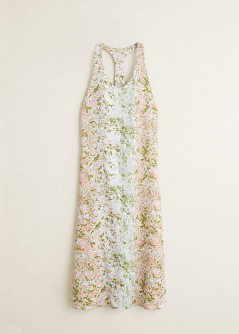

In [58]:
image1

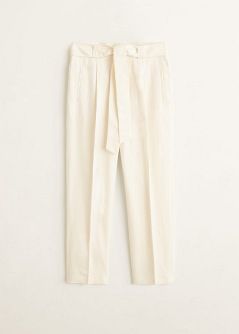

In [61]:
image

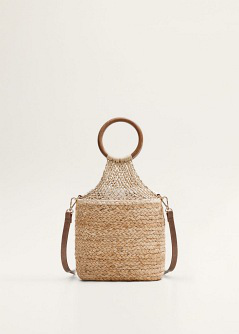

In [62]:
image3

In [28]:
image_pos = Image.open("./datathon/images/2019_43097037_02.jpg")
image_neg = Image.open("./datathon/images/2019_51005038_99.jpg")

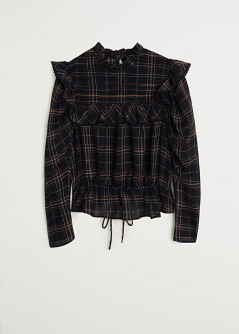

In [73]:
image_neg

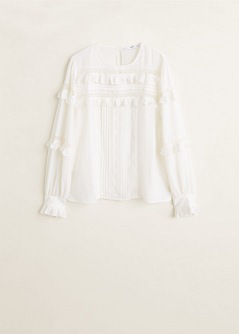

In [71]:
image_pos

In [74]:
inputs_prov = processor(images = [image_neg,image_pos],return_tensors="pt", padding = True)

In [76]:
emb_pos, emb_neg = inputs_prov['pixel_values']

In [ ]:

directorio_imagenes = "datathon/images"

imagenes = [archivo for archivo in os.listdir(directorio_imagenes) if archivo.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

fotos = list()
for imagen in imagenes:
    fotos.append( os.path.join(directorio_imagenes, imagen)) 

# Abre la imagen
imagen = Image.open(fotos[0])